# 1. Importing libraries and data

# 2. Data Wrangling

----

# 1. Importing libraries and data

In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8-talk')

In [295]:
#Creating Pathway for data
path =(r'C:\Users\colmu\Desktop\Documents\GitHub Documents\CF_WHR')

In [296]:
#Importing dataset OECD Gross domestic product (GDP)
df_OECD =pd.read_csv(os.path.join(path,'data','original Data','GDP by Country',"OECD GDP quartertly 2007 to 2020.csv"))
df_OECD

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,KOR,QGDP,TOT,PC_CHGPP,Q,2007-Q3,1.173831,NaN
1,KOR,QGDP,TOT,PC_CHGPP,Q,2007-Q4,2.156949,NaN
2,KOR,QGDP,TOT,PC_CHGPP,Q,2008-Q1,0.402395,NaN
3,KOR,QGDP,TOT,PC_CHGPP,Q,2008-Q2,0.523473,NaN
4,KOR,QGDP,TOT,PC_CHGPP,Q,2008-Q3,0.815881,NaN
...,...,...,...,...,...,...,...,...
2886,HRV,QGDP,TOT,PC_CHGPP,Q,2019-Q4,-0.564373,NaN
2887,HRV,QGDP,TOT,PC_CHGPP,Q,2020-Q1,-1.344949,NaN
2888,HRV,QGDP,TOT,PC_CHGPP,Q,2020-Q2,-14.491617,NaN
2889,HRV,QGDP,TOT,PC_CHGPP,Q,2020-Q3,5.488159,NaN


# 2. Data Wrangling

In [297]:
df_OECD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    2891 non-null   object 
 1   INDICATOR   2891 non-null   object 
 2   SUBJECT     2891 non-null   object 
 3   MEASURE     2891 non-null   object 
 4   FREQUENCY   2891 non-null   object 
 5   TIME        2891 non-null   object 
 6   Value       2891 non-null   float64
 7   Flag Codes  44 non-null     object 
dtypes: float64(1), object(7)
memory usage: 180.8+ KB


In [298]:
# Checking for missing values 

df_OECD.isnull().sum() 

LOCATION         0
INDICATOR        0
SUBJECT          0
MEASURE          0
FREQUENCY        0
TIME             0
Value            0
Flag Codes    2847
dtype: int64

In [299]:
# Check for duplicates

dups = df_OECD.duplicated()
dups.sum()

# No dups!

0

In [300]:
df_OECD.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')

In [301]:
#dropping columns unrequired for analysis

df_OECD = df_OECD.drop(columns = ['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'])

df_OECD

,LOCATION,TIME,Value
0,KOR,2007-Q3,1.173831
1,KOR,2007-Q4,2.156949
2,KOR,2008-Q1,0.402395
3,KOR,2008-Q2,0.523473
4,KOR,2008-Q3,0.815881
...,...,...,...
2886,HRV,2019-Q4,-0.564373
2887,HRV,2020-Q1,-1.344949
2888,HRV,2020-Q2,-14.491617
2889,HRV,2020-Q3,5.488159


In [302]:
#renaming columns for clarity

df_OECD.rename(columns={'LOCATION':'country_code', 'TIME':'year', 'Value':'GDP_per_capita'}, inplace=True)

df_OECD

,country_code,year,GDP_per_capita
0,KOR,2007-Q3,1.173831
1,KOR,2007-Q4,2.156949
2,KOR,2008-Q1,0.402395
3,KOR,2008-Q2,0.523473
4,KOR,2008-Q3,0.815881
...,...,...,...
2886,HRV,2019-Q4,-0.564373
2887,HRV,2020-Q1,-1.344949
2888,HRV,2020-Q2,-14.491617
2889,HRV,2020-Q3,5.488159


In [303]:
#checking countries 
df_OECD['country_code'].value_counts() 

country_code
KOR          54
POL          54
IDN          54
LUX          54
ZAF          54
RUS          54
PRT          54
ITA          54
AUT          54
IRL          54
CHE          54
NZL          54
CHL          54
SWE          54
FRA          54
GRC          54
OECDE        54
G-7          54
G-20         54
COL          54
LTU          54
BGR          54
ROU          54
EU27_2020    54
CRI          54
AUS          54
DEU          54
CZE          54
LVA          54
ISL          54
GBR          54
EST          54
DNK          54
ESP          54
JPN          54
OECD         54
NOR          54
HUN          54
CAN          54
ARG          54
SVN          54
FIN          54
BRA          54
NLD          54
USA          54
SVK          54
MEX          54
BEL          54
ISR          54
TUR          54
IND          54
HRV          54
SAU          43
CHN          40
Name: count, dtype: int64

GDP_per_capita was chosen for the focus of thislinear regression as it was found to have a moderate correlation to happiness_scores in the previous hypothesis testing. Data was pulled for the OECD data bank due to teh Nasdaq website link currently being down for pulling.

Due to this data originating from a different source than the World Bank, it encompasses a more restricted set of countries—approximately half compared to the primary dataset. However, this dataset serves a unique purpose in ongoing linear regression techniques in its quarterly breakdown of GDP_per_capita, offering a wealth of data points for analyses. Notably. I have confined the data to the past 15 years, extending one year beyond 2019, the last year of the analyzed World Happiness Reports and gone back to 2007,approximatly 15 years into the past of the available financial content on the OECD website.

### Seperating 'year' and 'Q' into a numeric date and dropping previous columns

In [304]:
# Converting year to string for concatenation
df_OECD[['year', 'quarter']] = df_OECD['year'].str.split('-', expand=True)

In [305]:
# Create 'date' column using .loc
df_OECD.loc[:, 'date'] = pd.to_datetime(df_OECD['year'] + '-' + df_OECD['quarter'].str[1:] + '-01')
print(df_OECD)

     country_code  year  GDP_per_capita quarter       date
0             KOR  2007        1.173831      Q3 2007-03-01
1             KOR  2007        2.156949      Q4 2007-04-01
2             KOR  2008        0.402395      Q1 2008-01-01
3             KOR  2008        0.523473      Q2 2008-02-01
4             KOR  2008        0.815881      Q3 2008-03-01
...           ...   ...             ...     ...        ...
2886          HRV  2019       -0.564373      Q4 2019-04-01
2887          HRV  2020       -1.344949      Q1 2020-01-01
2888          HRV  2020      -14.491617      Q2 2020-02-01
2889          HRV  2020        5.488159      Q3 2020-03-01
2890          HRV  2020        8.207861      Q4 2020-04-01

[2891 rows x 5 columns]


In [306]:
#Checking Data types
df_OECD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country_code    2891 non-null   object        
 1   year            2891 non-null   object        
 2   GDP_per_capita  2891 non-null   float64       
 3   quarter         2891 non-null   object        
 4   date            2891 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 113.1+ KB


Text(0.5, 1.0, 'GDP per Capita Quartly Percentange Changes')

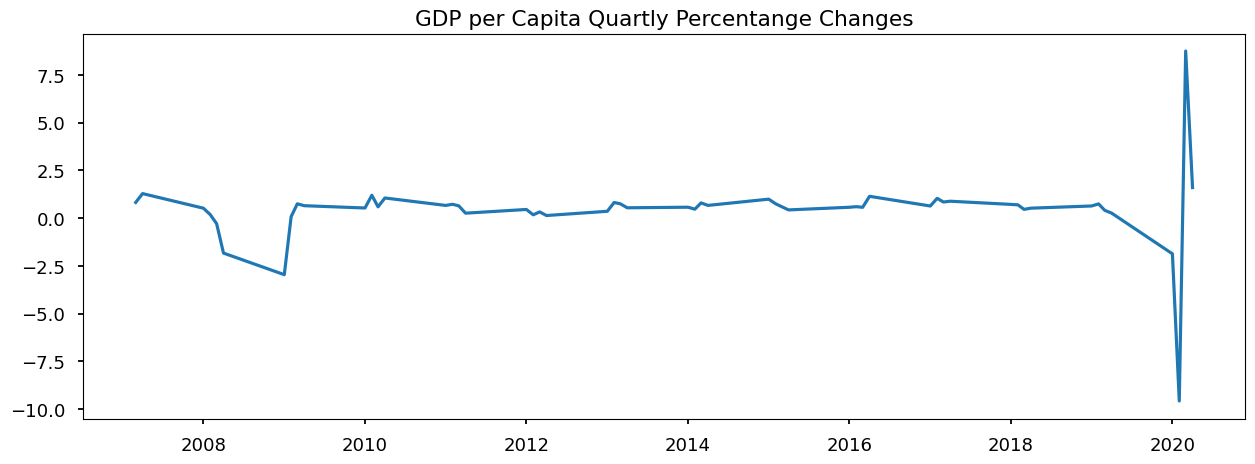

In [307]:
#aggregating GDP_per_capita data for time series analysis

df_GDP_capita = df_OECD.groupby(df_OECD['date'])['GDP_per_capita'].mean()

# Initial plot using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(df_GDP_capita)
plt.title('GDP per Capita Quartly Percentange Changes')

# 3. Time-series analysis: decomposition

In [308]:
# Decomposing the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_GDP_capita, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [261]:
# Defining a fixed size for all special charts
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

In [262]:
# Plot the separate components

decomposition.plot()
plt.show()

NameError: name 'decomposition' is not defined

### GDP per capita

In [201]:
# Decomposing the time series using an additive model

decomposition2 = sm.tsa.seasonal_decompose(df_GDP_capita, model='additive')

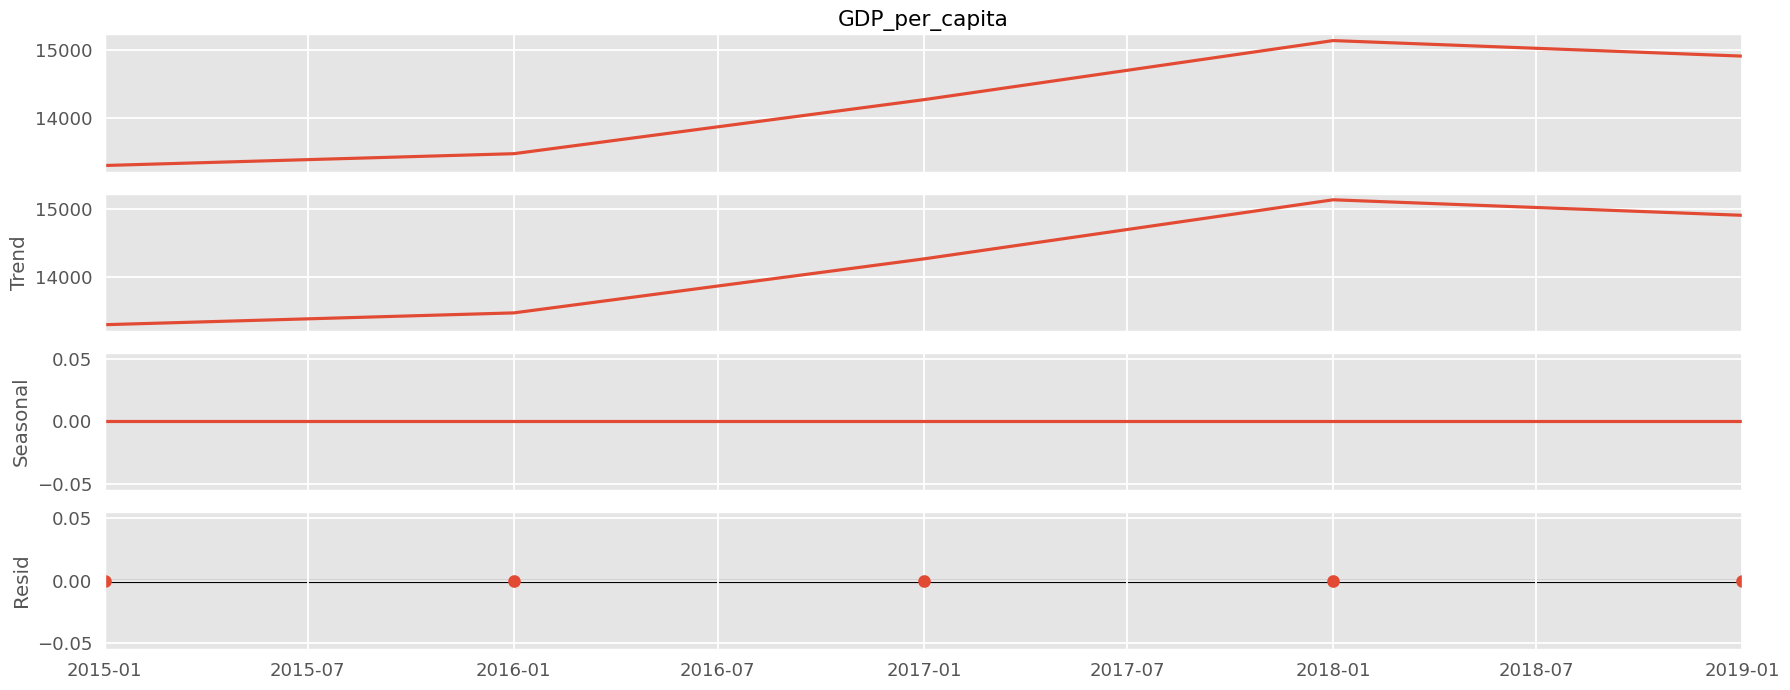

In [202]:
# Plot the separate components

decomposition2.plot()
plt.show()